# Статистическая значимость

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, t, norm
import matplotlib.pyplot as plt

### Загрузка данных

In [1]:
filename = 'sample.csv'

In [4]:
dataset = pd.read_csv(filename, sep='\t', header=None)
dataset[2] = dataset[1] - dataset[0]
dataset

,0,1,2
0,0.73,0.76,0.03
1,0.71,0.79,0.08
2,0.78,0.81,0.03
3,0.70,0.74,0.04
4,0.75,0.78,0.03


In [5]:
print(f'mean1 = {dataset[0].mean():.4f}, mean2 = {dataset[1].mean():.4f}, mean3 = {dataset[2].mean():.4f}')

mean1 = 0.7340, mean2 = 0.7760, mean3 = 0.0420


### t-критерий Стьюдента

Вычисление t-критерия Стьюдента для средних двух независимых выборок ([ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)):

In [69]:
from scipy.stats import ttest_ind

ttest_result = ttest_ind(dataset[0], dataset[1], alternative='two-sided', equal_var=True)
ttest_result

TtestResult(statistic=-2.238607521733915, pvalue=0.05554600014224001, df=8.0)

In [70]:
ttest_result.confidence_interval(confidence_level=0.99)

ConfidenceInterval(low=-0.10495264647679235, high=0.020952646476792056)

### Распределение Стьюдента

Вычисление критических значений для заданных уровней значимости:

In [71]:
# уровень значимости
aplha = 0.05

# односторонний или двусторонний
sided = 'two-sided'

if sided == 'two-sided':
    denom = 2
else:
    denom = 1
        
critical_value = t.ppf(1 - aplha/denom, df=df)
critical_value

2.3060041350333704

Вычисление вероятностей для критических значений (cdf = cumulative distribution function):

In [72]:
# критическое значение
critical_value = 2.306

# степени свободы
df = 8

t.cdf(critical_value, df=df)

0.9749998386193579

Рисуем график плотности вероятности распределения Стьюдента с $df$ степенями свободы с указанием на нем некоторого критического значения:

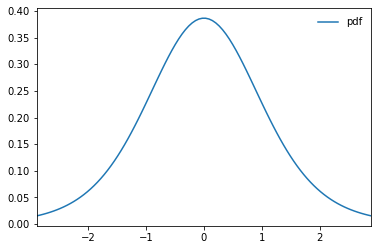

In [73]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 100)
rv = t(df)
ax.plot(x, rv.pdf(x), label='pdf')
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

### Доверительные интервалы

In [74]:
from scipy.stats import t, norm

In [75]:
alpha = 0.05

Доверительный интервал в соответствии с нормальным распределением:

In [76]:
norm.interval(1 - alpha, loc=dataset[2].mean(), scale=dataset[2].sem())

(0.022997444141767482, 0.061002555858232596)

Доверительный интервал в соответствии с распределением Стьюдента:

In [77]:
t.interval(1 - alpha, df=len(dataset[2])-1, loc=dataset[2].mean(), scale=dataset[2].sem())

(0.015081365976620957, 0.06891863402337911)